## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

En este problema vamos a estudiar cómo muestrear puntos aleatorios usando el método de la distribución cumulativa inversa.



a) Es posible muestrear puntos uniformes entre (0, 1) usando algebra modular, 

Para ello calcule iterativamente los puntos que se generan de la siguiente formula

$$
  seed_{i+1} = (seed_i * a + c) \ \% \ mod
$$

los valores $seed_{i}$ corresponden a numeros aleatorios generados entre 0 y $mod$, para que sean valores entre 0, y 1 divida al final los numeros obtenidos del las $\{seed_{i}\}$ por $mod$

Genere 10 puntos aleatorios entre 0 y 1, con los siguientes parametros

$
seed_{0} = 12345
$

$
a = 1664525
$

$
c = 1013904223
$

$
mod = 2^{32}
$





In [2]:
def uniform_distribution(num_samples):
  nums_uniform = np.zeros(num_samples)
  seed = 12345
  a = 1664525
  c = 1013904223
  m = 2**32
  nums_uniform[0] = seed
  for i in range(1, num_samples):
    nums_uniform[i] = (a*nums_uniform[i-1] + c) % m
  return nums_uniform/m 

# codigo para verificar su respuesta (no modificar)
uniform_distribution(10)

array([2.87429430e-06, 2.04026857e-02, 1.65478482e-02, 5.43155794e-01,
       6.34904056e-01, 9.10029514e-01, 1.12461669e-01, 4.95889405e-01,
       5.48348844e-01, 5.96100117e-01])

b) Realice un histograma que indique 10000 puntos muestreados de la función de la parte a)

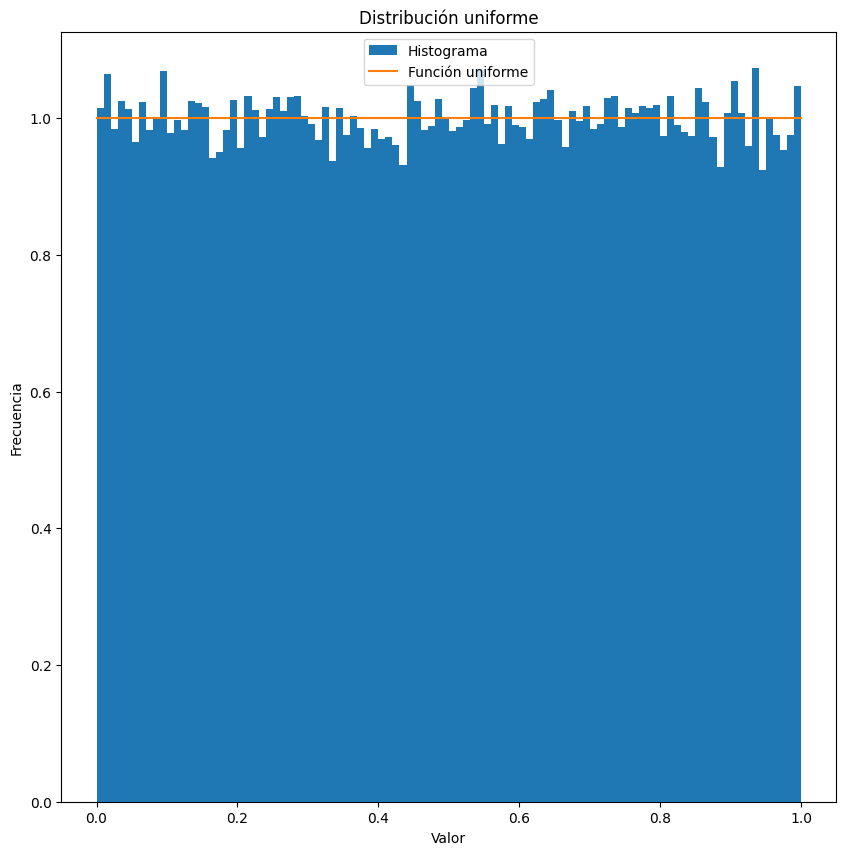

In [3]:
## su codigo aqui
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.hist(uniform_distribution(100000), bins=100, density=True, label='Histograma')
ax.plot(np.linspace(0,1,100), np.ones(100), label='Función uniforme')
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución uniforme')
ax.legend()

plt.show()

Un teorema de la probabilidad indica que la densidad de probabilidad cumulativa (CDF) de una función de densidad arbitraria es una distribución uniforme. Esto indica que es posible muestrear algunas funciones de densidad de probabilidad especiales, haciendo el proceso inverso (inverse cumulative distribution), es decir pasar de una distribución uniforme a otra distribución.

Matematicamente tiene la siguiente forma: Sea $p(t)$ un función de densidad. La función acumulativa es, 

$$
  \int_{-∞}^xp(t)\,dt = \text{Uniform distribution}
$$

En este problema vamos a muestrear una uniforme para obtener un muestreo de la función $p(t) = e^{-t}$ para $x>0$.

c)  Realice la integral mostrada, completando la igualdad, 

$$
 f(x) = \int_{0}^xe^{-x}\,dt = -e^{-x} 
$$



d) Iguale $f(x) = U$, donde U es la distribución uniforme y despeje la variable x, (complete la igualdad),

$$
  f(x) = -e^{-x} \rightarrow U = -e^{-x} \rightarrow x = -\ln(-U)
$$

e) Realice un muestreo de la variable $x$, realizando la operación del numeral d sobre los puntos muetreados de una uniforme.

In [4]:
# su codigo aqui
def exp_distribution(num_samples):
  exp_samples = np.zeros(num_samples)
  u = uniform_distribution(num_samples)
  seed = 12345

  for i in range(num_samples):
    u_s = u[i]
    exp_samples[i] = -np.log(1-u_s)
  return exp_samples

# codigo para verificar su respuesta (no modificar)
exp_distribution(10)

array([2.87429843e-06, 2.06136956e-02, 1.66862933e-02, 7.83412853e-01,
       1.00759510e+00, 2.40827359e+00, 1.19303569e-01, 6.84959601e-01,
       7.94845177e-01, 9.06588246e-01])

f) Realice un histograma de los 10000 puntos muestreados de la función de densidad $p(t) = e^{-t}$

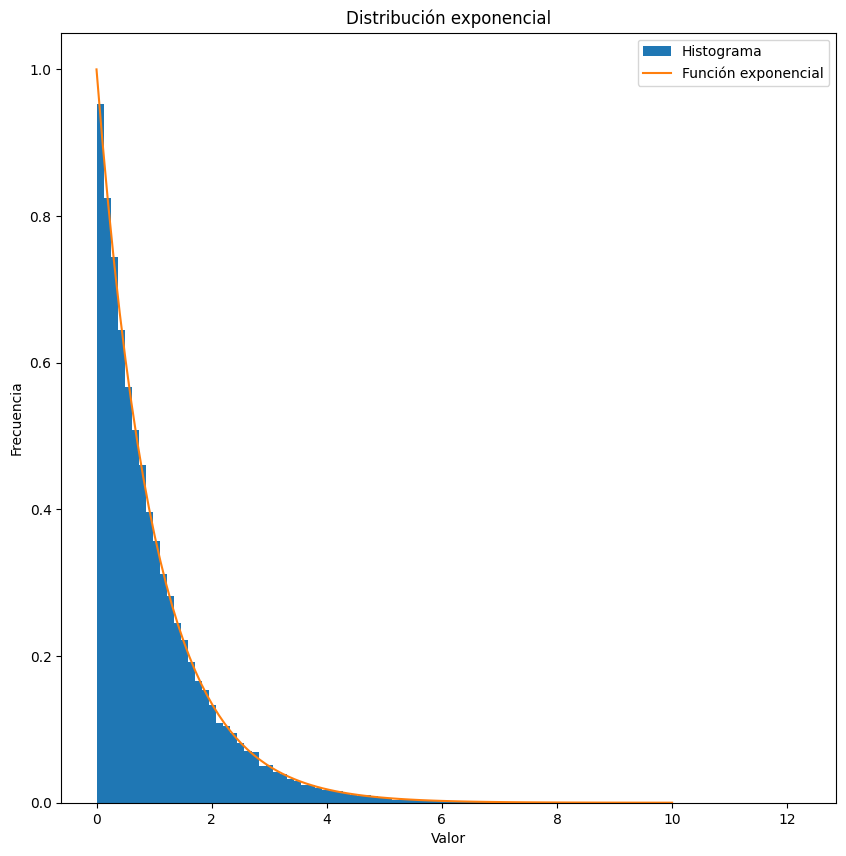

In [5]:
dist = exp_distribution(100000)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

ax.hist(dist, bins=100,label='Histograma', density=True)
ax.plot(np.linspace(0,10,100), np.exp(-np.linspace(0,10,100)), label='Función exponencial')
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución exponencial')
#set axis lims
ax.legend()

plt.show()

g) Cómo haría usted para muestrear un función normal?

en vez de realiar primero la integral y luego la inversa, se puede realizar la inversa de la integral directamente